In [ ]:
!pip install scikit-multilearn==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, confusion_matrix, multilabel_confusion_matrix

from transformers import AutoTokenizer


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_l1= pd.read_csv('/content/train_hi_l1.csv')
df_l1





,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


In [ ]:
df_l1_test= pd.read_csv('/content/test_hi_l1.csv' ,  engine = 'python' )
df_l1_test

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN


In [ ]:
df_l3= pd.read_csv('/content/train_hi_l3.csv')
df_l3

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_3,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_3,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_3,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_3,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_3,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_3,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_3,NaN,1.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_3,NaN,NaN,NaN,1.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_3,NaN,NaN,NaN,NaN,0.0


In [ ]:
df_l3_test= pd.read_csv('/content/test_hi_l3.csv',engine = 'python')
df_l3_test

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_3,NaN,1.0,1.0,1.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_3,NaN,1.0,1.0,1.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_3,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_3,NaN,0.0,0.0,1.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_3,1.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_3,NaN,0.0,NaN,1.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_3,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_3,1.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_3,1.0,NaN,1.0,1.0,NaN


In [ ]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie



In [ ]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label, axis=1)
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN,0.0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
df_l1_test['label_1'] = df_l1_test[annotation_cols].apply(get_majority_label, axis=1)
df_l1_test

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN,0.0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN,1.0
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN,0.0


In [ ]:
# Apply to DataFrame
df_l3['label_3'] = df_l3[annotation_cols].apply(get_majority_label, axis=1)
df_l3

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_3
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_3,NaN,NaN,NaN,0.0,NaN,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_3,NaN,0.0,NaN,NaN,NaN,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_3,NaN,NaN,NaN,NaN,0.0,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_3,NaN,NaN,NaN,0.0,NaN,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_3,NaN,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_3,NaN,NaN,NaN,0.0,NaN,0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_3,NaN,1.0,NaN,NaN,NaN,1
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_3,NaN,NaN,NaN,1.0,NaN,1
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_3,NaN,NaN,NaN,NaN,0.0,0


In [ ]:
df_l3_test['label_3'] = df_l3_test[annotation_cols].apply(get_majority_label, axis=1)
df_l3_test

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_3
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_3,NaN,1.0,1.0,1.0,NaN,1.0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_3,NaN,1.0,1.0,1.0,NaN,1.0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_3,0.0,0.0,0.0,NaN,NaN,0.0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_3,NaN,0.0,0.0,1.0,NaN,0.0
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_3,1.0,NaN,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_3,NaN,0.0,NaN,1.0,0.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_3,NaN,0.0,NaN,1.0,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_3,1.0,NaN,NaN,0.0,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_3,1.0,NaN,1.0,1.0,NaN,1.0


In [ ]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],
    'label_3': df_l3['label_3']
})

# Drop rows where either label_1 or label_3 is NaN
df = df.dropna(subset=['label_1', 'label_3'])

# Convert to int
df['label_1'] = df['label_1'].astype(int)
df['label_3'] = df['label_3'].astype(int)

# Preview
print(df.head())
print(df.shape)


                                                text  label_1  label_3
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...        0        0
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...        0        0
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...        0        0
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...        0        0
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...        1        1
(6196, 3)


In [ ]:
# Combine directly assuming same text order
df_test = pd.DataFrame({
    'text': df_l1_test['text'],
    'label_1': df_l1_test['label_1'],
    'label_3': df_l3_test['label_3']
})

df_test = df_test.dropna(subset=['label_1', 'label_3'])

# Convert to int
df_test['label_1'] = df_test['label_1'].astype(int)
df_test['label_3'] = df_test['label_3'].astype(int)

# Preview
print(df_test.head())
print(df_test.shape)


                                                text  label_1  label_3
0  #BandraStation #SharadPawar #Muradabad  अगर अभ...        0        1
1  #ConspiracyAgainstIndia  सुन लो रे देश के गद्द...        0        1
2  #MarathaReservation : महाराष्ट्र में जश्न का म...        0        0
3  #RheaChakraborty aap Mahesh bhatt se madad kiy...        1        0
4  #SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...        0        1
(1516, 3)


In [ ]:
df.head(85)

,text,label_1,label_3
0,"This is our history . For Shia and Sunni ,...",0,0
1,"If this is ""grilling"" then wht wud u call t...",1,1
2,look at <handle replaced>madam. Locals attac...,0,0
3,our beloved yogi ji has given money home and...,1,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1,1
...,...,...,...
80,<handle replaced> I come from a normal family ...,0,0
81,<handle replaced> Jai hind. We support CAA. ...,0,1
82,<handle replaced> Just saw few clips of u figh...,1,1
83,<handle replaced> Just saw few clips of ur big...,0,0


In [ ]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'<handle replaced>', '[USER]', text)       # Replace user handles
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          # Remove URLs
    text = re.sub(r'<.*?>', '', text)                          # Remove any other HTML tags
    text = re.sub(r'\s+', ' ', text).strip()                   # Normalize whitespace
    return text

In [ ]:
df['text'] = df['text'].apply(normalize_text)
df


,text,label_1,label_3
0,भारत में तीन किसान कानून बिल वापस लेने पर भक्त...,0,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए रात...,0,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम ग...,0,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी क...,0,0
4,"""pm मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1,1
...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली :...",0,0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,0,1
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 school में हमें सती प...,0,1
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",0,0


In [ ]:
df_test['text'] = df_test['text'].apply(normalize_text)
df_test


,text,label_1,label_3
0,#bandrastation #sharadpawar #muradabad अगर अभी...,0,1
1,#conspiracyagainstindia सुन लो रे देश के गद्दा...,0,1
2,#marathareservation : महाराष्ट्र में जश्न का म...,0,0
3,#rheachakraborty aap mahesh bhatt se madad kiy...,1,0
4,"#secularmaskofd हमे पता नहि क्या कहते है ,इतना...",0,1
...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,0,0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",1,1
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संविध...,0,0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़ी...,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Create a helper column to stratify on both labels
df['label_combo'] = df['label_1'].astype(str) + '_' + df['label_3'].astype(str)

# Stratified train-validation split
train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label_combo']
)

# Drop the helper column from splits
train_df = train_df.drop(columns='label_combo')
val_df = val_df.drop(columns='label_combo')

# Optional: show split sizes
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")


Train size: 5266
Validation size: 930


In [ ]:
train_df.head(100)

,text,label_1,label_3
3616,[USER]किसी मादरजात की हरकत है।,1,0
372,[USER][USER][USER][USER][USER][USER][USER][USE...,1,0
2941,[USER]waqt as gaya hai is desh se farari kaatn...,0,1
2627,[USER]kya kar rahi ho,0,0
11,"""हथियारों के खरीद को लेकर भारत पर दबाव बना रहा...",0,0
...,...,...,...
3114,[USER]ye sochke mi ye show shuru kiya ki ek cu...,0,1
3361,[USER]आयेगातो मोदी ही,0,0
159,[USER] इतिहास गवाह है सर औरत को हमेशा ही पैर क...,0,0
4930,[USER]साले सब कुत्ते देश द्रोही सुअर की औलाद है,0,1


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
import torch

# Load pretrained IndicBERT
MODEL_NAME = "ai4bharat/indic-bert"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
base_model = AutoModel.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import Dataset

class MultiTaskDataset(Dataset):
    def __init__(self, texts, label1, label3, tokenizer, max_len=128):
        self.texts = texts
        self.label1 = label1
        self.label3 = label3
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label_1': torch.tensor(self.label1[idx], dtype=torch.float),
            'label_3': torch.tensor(self.label3[idx], dtype=torch.float)
        }


In [ ]:
from torch.utils.data import DataLoader

def create_dataloaders(train_df, val_df, tokenizer, batch_size=16):
    train_dataset = MultiTaskDataset(
        train_df['text'].tolist(),
        train_df['label_1'].tolist(),
        train_df['label_3'].tolist(),
        tokenizer
    )
    val_dataset = MultiTaskDataset(
        val_df['text'].tolist(),
        val_df['label_1'].tolist(),
        val_df['label_3'].tolist(),
        tokenizer
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader


In [ ]:
from torch.utils.data import DataLoader

def create_test_loader(test_df, tokenizer, batch_size=16):
    test_dataset = MultiTaskDataset(
        test_df['text'].tolist(),
        test_df['label_1'].tolist(),
        test_df['label_3'].tolist(),
        tokenizer
    )

    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    return test_loader


In [ ]:
class MultiTaskIndicBERT(nn.Module):
    def __init__(self, base_model):
        super(MultiTaskIndicBERT, self).__init__()
        self.bert = base_model
        hidden_size = self.bert.config.hidden_size

        self.dropout = nn.Dropout(0.3)

        # Task-specific heads
        self.classifier_1 = nn.Linear(hidden_size, 1)  # For label_1
        self.classifier_3 = nn.Linear(hidden_size, 1)  # For label_3

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = self.dropout(outputs.last_hidden_state[:, 0, :])  # [CLS] token

        out_1 = torch.sigmoid(self.classifier_1(cls_output))
        out_3 = torch.sigmoid(self.classifier_3(cls_output))

        return out_1.squeeze(-1), out_3.squeeze(-1)


In [ ]:
from torch.optim import AdamW
from torch.nn import BCELoss

import matplotlib.pyplot as plt
import torch.nn as nn
import torch

def train_model(
    model, train_loader, val_loader, epochs=5, lr=5e-6, device='cuda',
    save_path="best_model.pt"
):
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    loss_fn = nn.BCELoss()

    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # ------- TRAINING -------
        model.train()
        running_train_loss = 0

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            optimizer.zero_grad()
            out_1, out_3 = model(input_ids, attention_mask)

            loss_1 = loss_fn(out_1, label_1)
            loss_3 = loss_fn(out_3, label_3)
            loss = loss_1 + loss_3

            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # ------- VALIDATION -------
        model.eval()
        running_val_loss = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                label_1 = batch['label_1'].to(device)
                label_3 = batch['label_3'].to(device)

                out_1, out_3 = model(input_ids, attention_mask)

                loss_1 = loss_fn(out_1, label_1)
                loss_3 = loss_fn(out_3, label_3)
                loss = loss_1 + loss_3

                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

        # Save the best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), save_path)
            print(f"✅ Saved new best model at epoch {epoch+1}")

    # ------- PLOT LOSSES -------
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



Epoch 1/5 - Train Loss: 1.2911 - Val Loss: 1.2654
✅ Saved new best model at epoch 1
Epoch 2/5 - Train Loss: 1.2381 - Val Loss: 1.2399
✅ Saved new best model at epoch 2
Epoch 3/5 - Train Loss: 1.2143 - Val Loss: 1.2484
Epoch 4/5 - Train Loss: 1.1743 - Val Loss: 1.2126
✅ Saved new best model at epoch 4
Epoch 5/5 - Train Loss: 1.1395 - Val Loss: 1.2110
✅ Saved new best model at epoch 5


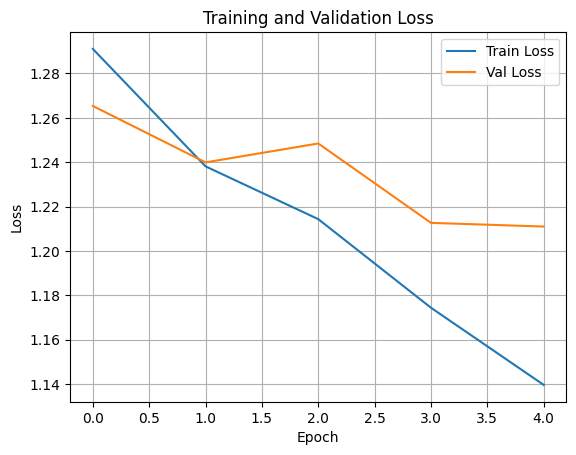

In [ ]:
# Create loaders
train_loader, val_loader = create_dataloaders(train_df, val_df, tokenizer)

# Initialize model
model = MultiTaskIndicBERT(base_model)

# Train
train_model(model, train_loader, val_loader)

In [ ]:
from sklearn.metrics import f1_score

def evaluate_model(model, data_loader, device='cuda'):
    model.eval()
    y_true_1 = []
    y_pred_1 = []

    y_true_3 = []
    y_pred_3 = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            out_1, out_3 = model(input_ids, attention_mask)

            # Convert probs to binary predictions
            pred_1 = (out_1 > 0.5).int().cpu().numpy()
            pred_3 = (out_3 > 0.5).int().cpu().numpy()

            y_true_1.extend(label_1.cpu().numpy())
            y_pred_1.extend(pred_1)


            y_true_3.extend(label_3.cpu().numpy())
            y_pred_3.extend(pred_3)

    # Compute F1
    # print(y_pred_1)
    # print(y_pred_3)
    f1_1 = f1_score(y_true_1, y_pred_1, average='macro')
    f1_3 = f1_score(y_true_3, y_pred_3, average='macro')

    print(f"Macro F1-score for Label 1 (gendered abuse): {f1_1:.4f}")
    print(f"Macro F1-score for Label 3 (explicit content): {f1_3:.4f}")
    return f1_1, f1_3


In [ ]:
evaluate_model(model, val_loader, device='cuda')

Macro F1-score for Label 1 (gendered abuse): 0.4342
Macro F1-score for Label 3 (explicit content): 0.6113


(0.43415129556433907, 0.6113140024517707)

In [ ]:
test_loader = create_test_loader(df_test,tokenizer)
evaluate_model(model, test_loader, device='cuda')


Macro F1-score for Label 1 (gendered abuse): 0.4532
Macro F1-score for Label 3 (explicit content): 0.7009


(0.45323522506456465, 0.700936928149803)